# Generating samples for Watts-Strogatz Small-World (SW) networks and PCA analysis

In this section, the functions from the ``samnet`` module are used to obtain samples from random networks generated from the Watts-Strogatz Small-World model. Networks metrics for these samples and the original sampled network are calculated. Then, a Principal Components Analysis is performed for dimension reduction of the calculated metrics and 2d and 3d graphics are plotted so we can see the distance between the topology of the samples and the original network.

In [2]:
from samnet import *

The following function is used to obtain a dataframe that includes the PCA principal components that explain the largest share of the variability from the metrics data. It receives the dataframe containing the metrics obtained from the original network and from the samples, the number of principal components to return, and the columns that should not be used for the PCA. It returns the original dataframe containing the original metrics and the principal components scores.

In [3]:
def pca_table_processing(df: pd.DataFrame, components:int=3, last_columns_discount:int=3)->pd.DataFrame:
    
    df = df.copy()
    
    col_names = df.drop(['method', 'net id', 'len'],axis=1).columns

    from sklearn.preprocessing import MinMaxScaler
    mm_scaler = MinMaxScaler()
    df_mm = mm_scaler.fit_transform(df.drop(['method', 'net id', 'len'], axis = 1))

    df_mm = pd.DataFrame(df_mm, columns=col_names)

    df_mm['method'] = data['method'].copy()
    df_mm['net id'] = data['net id'].copy()
    df_mm['len'] = data['len'].copy()
    
    
    pca = PCA(n_components=components)

    X = np.matrix(df_mm.iloc[:,0:df_mm.shape[1]-last_columns_discount])
    pca.fit(X)

    print(np.round(pca.explained_variance_ratio_,6))
    
    for i in range(components):
        pca_column = pca.transform(X)[:,i]
        column_name = 'Component'+str(i)
        df[column_name] = pca_column
    
    return df

The networks used for this analysis were 10 SW model networks with n=300, k=10 and p=0.4.

In [4]:
graph_list = []

for _ in range(10):
    GSW = nx.connected_watts_strogatz_graph(n = 300, k = 10, p = 0.4)
    graph_list.append(GSW)

The ``total_gen`` function receives the original gtraphs list, a list containing the vetex proportions of the sample in comparison with the original networks, and the number of samples to be obtained of each kind. For this analysis, samples with 10%, 25% and 40% of the number of original vertices are obtained using each of the 5 samlping methods (IRSW, RSW, MHRW, TR and SB). The number of samples by kind is 250, hence, for each combination of original network, sampling method and network size, 250 samples are generated, resulting in 37500 samples.

In [5]:
data = total_gen(graph_list, [0.1, 0.25, 0.4], 250)

Completeness:   0.0
Completeness:   0.0
Completeness:   0.0
Completeness:   0.001
Completeness:   0.001
Completeness:   0.001
Completeness:   0.001
Completeness:   0.001
Completeness:   0.001
Completeness:   0.001
Completeness:   0.001
Completeness:   0.002
Completeness:   0.002
Completeness:   0.002
Completeness:   0.002
Completeness:   0.002
Completeness:   0.002
Completeness:   0.002
Completeness:   0.003
Completeness:   0.003
Completeness:   0.003
Completeness:   0.003
Completeness:   0.003
Completeness:   0.003
Completeness:   0.003
Completeness:   0.003
Completeness:   0.004
Completeness:   0.004
Completeness:   0.004
Completeness:   0.004
Completeness:   0.004
Completeness:   0.004
Completeness:   0.004
Completeness:   0.005
Completeness:   0.005
Completeness:   0.005
Completeness:   0.005
Completeness:   0.005
Completeness:   0.005
Completeness:   0.005
Completeness:   0.005
Completeness:   0.006
Completeness:   0.006
Completeness:   0.006
Completeness:   0.006
Completeness:   

In [6]:
data.head()

,Assortativity,Transitivity,Av. shortest p.,Complexity Coef,1m Degree,2m Degree,3m Degree,4m Degree,H Degree,1m L. clustering,...,4m PageRank,H PageRank,1m Eigenvector,2m Eigenvector,3m Eigenvector,4m Eigenvector,H Eigenvector,len,method,net id
0,-0.039973,0.157171,2.840535,10.302000,10.000000,103.020000,1091.300000,11870.100000,0.850265,0.163492,...,1.398930e-10,0.000000,0.056665,0.003333,0.000203,0.000013,0.000000,300,Original,0
1,-0.560685,0.246094,2.489655,6.688889,3.000000,20.066667,180.400000,1737.266667,0.603166,0.277037,...,2.027293e-05,0.141182,0.140524,0.033333,0.010541,0.003725,0.466182,30,SB,0
2,-0.171123,0.109091,6.255172,2.666667,2.200000,5.866667,19.800000,83.466667,0.423581,0.116667,...,3.025354e-06,0.000000,0.112365,0.033333,0.013073,0.006069,0.507119,30,RWS,0
3,0.031224,0.202247,3.958621,3.170732,2.733333,8.666667,31.333333,126.666667,0.569373,0.187778,...,2.028328e-06,0.000000,0.135410,0.033333,0.010213,0.003504,0.554222,30,IRWS,0
4,0.212894,0.065217,4.574713,2.533333,2.000000,5.066667,15.800000,57.466667,0.508030,0.020000,...,2.822269e-06,0.000000,0.125694,0.033333,0.012254,0.005203,0.527188,30,TR,0


In [7]:
data[data['method']=='SB'].shape

(7500, 47)

In [8]:
data.shape

(37510, 47)

In [9]:
data.to_csv('data/sw_robust_example.csv', index=False)

The PCA is obtained and the explained variance of the 3 first principal components are displayed by the function ``pca_processing_table``. PC0 explains 50% of the variability, PC1 28% and PC2 7% (the function scales the metrics to avoid metric scale impact). Hence, more than 80% of the variability is explained by the most important 3 components. The data is displayed bellow.

In [10]:
df = pca_table_processing(df=data)

[0.502466 0.276661 0.072557]


In [11]:
df.head()

,Assortativity,Transitivity,Av. shortest p.,Complexity Coef,1m Degree,2m Degree,3m Degree,4m Degree,H Degree,1m L. clustering,...,2m Eigenvector,3m Eigenvector,4m Eigenvector,H Eigenvector,len,method,net id,Component0,Component1,Component2
0,-0.039973,0.157171,2.840535,10.302000,10.000000,103.020000,1091.300000,11870.100000,0.850265,0.163492,...,0.003333,0.000203,0.000013,0.000000,300,Original,0,-1.574966,0.884166,0.351172
1,-0.560685,0.246094,2.489655,6.688889,3.000000,20.066667,180.400000,1737.266667,0.603166,0.277037,...,0.033333,0.010541,0.003725,0.466182,30,SB,0,0.689053,1.877014,-0.175949
2,-0.171123,0.109091,6.255172,2.666667,2.200000,5.866667,19.800000,83.466667,0.423581,0.116667,...,0.033333,0.013073,0.006069,0.507119,30,RWS,0,1.391534,-0.159341,0.260530
3,0.031224,0.202247,3.958621,3.170732,2.733333,8.666667,31.333333,126.666667,0.569373,0.187778,...,0.033333,0.010213,0.003504,0.554222,30,IRWS,0,0.748244,0.555013,0.503189
4,0.212894,0.065217,4.574713,2.533333,2.000000,5.066667,15.800000,57.466667,0.508030,0.020000,...,0.033333,0.012254,0.005203,0.527188,30,TR,0,1.112980,0.005665,0.126799


In [12]:
df.to_csv('data/pca_sw_robust_example.csv', index=False)

## 2d Graphics to compare samples using principal components

In [15]:
plt.style.use('ggplot')

<AxesSubplot:xlabel='Component0', ylabel='Component1'>

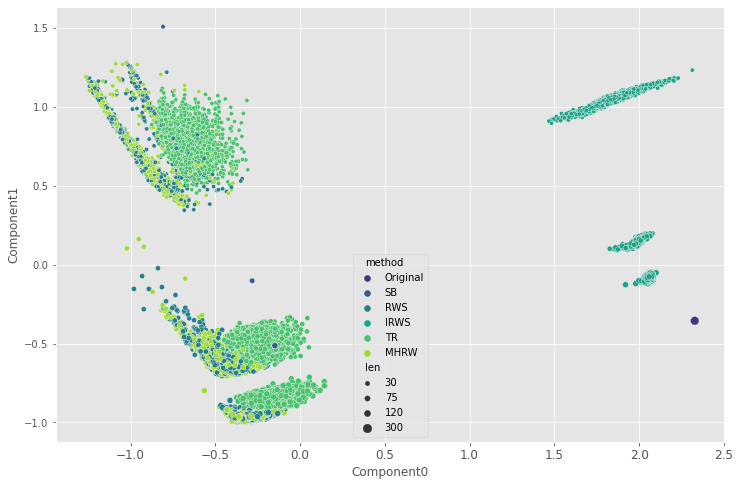

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="Component0", y="Component1", size = 'len', hue = "method", palette = "viridis")

## 3d Graphics to compare samples using the 3 components that explain more variance in the data

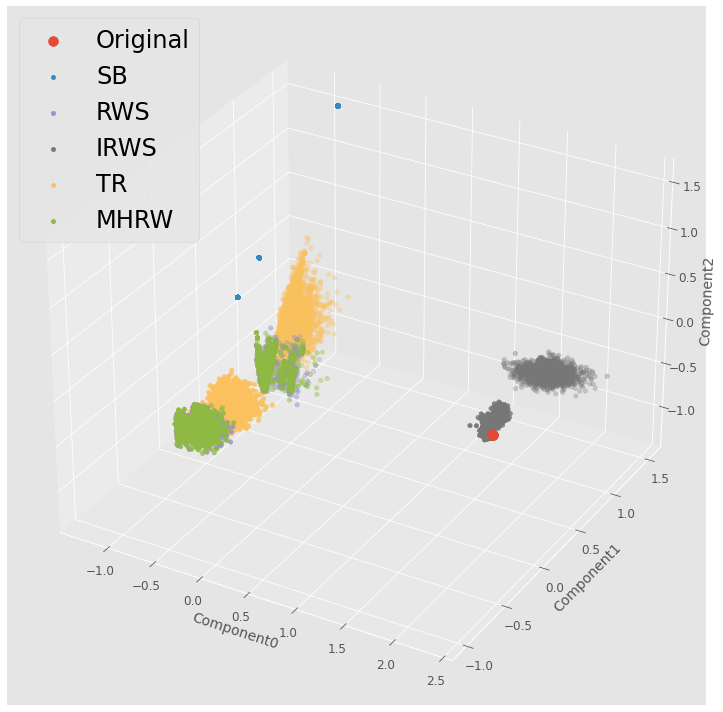

In [19]:
m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 12) 
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component0']
ys = df['Component1']
zs = df['Component2']


for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 100)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 24, loc = 'upper left')

ax.set_xlabel('Component0', fontsize = 14);
ax.set_ylabel('Component1', fontsize = 14);
ax.set_zlabel('Component2', fontsize = 14);

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.show()

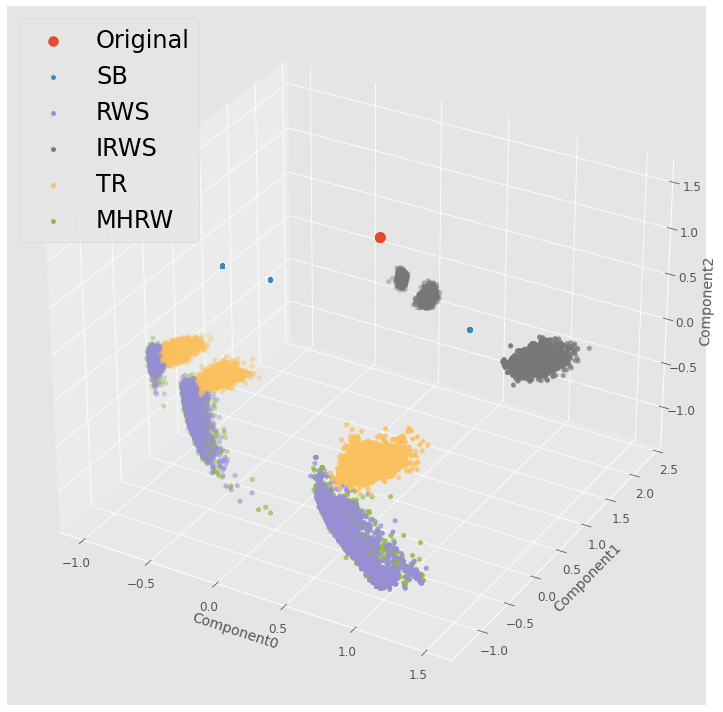

In [22]:
m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 12) 
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component1']
ys = df['Component0']
zs = df['Component2']


for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 100)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 24, loc = 'upper left')

ax.set_xlabel('Component0', fontsize = 14);
ax.set_ylabel('Component1', fontsize = 14);
ax.set_zlabel('Component2', fontsize = 14);

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.show()

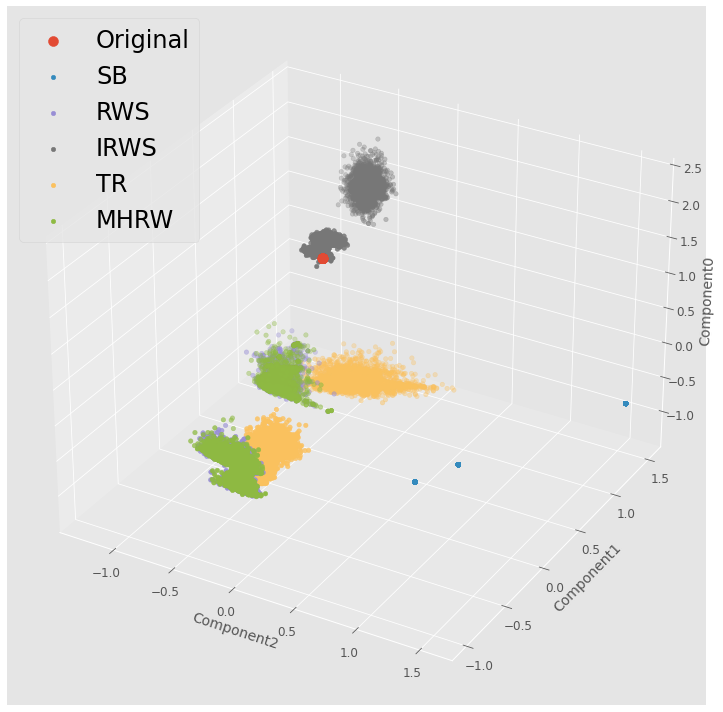

In [24]:
m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 12) 
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component2']
ys = df['Component1']
zs = df['Component0']


for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 100)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 24, loc = 'upper left')

ax.set_xlabel('Component2', fontsize = 14);
ax.set_ylabel('Component1', fontsize = 14);
ax.set_zlabel('Component0', fontsize = 14);

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.show()